#### General Steps to Follow

1. Importing Packages
1. Generate a Training Example and Visualize the Results

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## 1) Importing Packages

#### Add the repository directory path to the Python path

In [1]:
import os
import sys

REPO_DIR_PATH = os.path.normpath(os.path.join(
    os.path.join(os.path.dirname(os.getcwd()))))

sys.path.append(REPO_DIR_PATH)

In [2]:
from src.data_transformation import DataTransformer
from src.utils import plot_spectrogram
import matplotlib.pyplot as plt

### --------------------------------------------------------------------------------------------------------------------------------------------------------

##  2) Generate a Training Example and Visualize the Results

### Generating a Single Training Example

#### Benefits of synthesizing data
Because speech data is hard to acquire and label, we will synthesize the training data using the audio clips of positive, negative, and background. 
* It is quite slow to record lots of 10 second audio clips with random "positive" in it. 
* Instead, it is easier to record lots of positives and negative words, and record background noise separately (or download background noise from free online sources). 

#### Process for Synthesizing an audio clip
* To synthesize a single training example:
    - Pick a random 10 second background audio clip
    - Randomly insert 0-4 audio clips of "activate" into this 10 sec. clip
    - Randomly insert 0-2 audio clips of negative words into this 10 sec. clip

    * This makes it easier to generate the labels $y^{\langle t \rangle}$ as well. 


#### Label the positive/negative words
* Recall that the labels $y^{\langle t \rangle}$ represent whether or not someone has just finished saying "activate". 
    * $y^{\langle t \rangle} = 1$ when that clip has finished saying "activate".
    * Given a background clip, we can initialize $y^{\langle t \rangle}=0$ for all $t$, since the clip doesn't contain any "activate". 
* When you insert or overlay an "activate" clip, you will also update labels for $y^{\langle t \rangle}$.
    * Rather than updating the label of a single time step, we will update 50 steps of the output to have target label 1. 
    * Updating several consecutive time steps can make the training data more balanced.
* We will train a GRU (Gated Recurrent Unit) to detect when someone has **finished** saying "activate". 

##### Example
* Suppose the synthesized "activate" clip ends at the 5 second mark in the 10 second audio - exactly halfway into the clip. 
* Recall that $T_y = 1375$, so timestep $687 = $ `int(1375*(5/10))` corresponds to the moment 5 seconds into the audio clip. 
* Set $y^{\langle 688 \rangle} = 1$. 
* We will allow the GRU to detect "activate" anywhere within a short time-internal **after** this moment, so we actually **set 50 consecutive values** of the label $y^{\langle t \rangle}$ to 1. 
    * Specifically, we have $y^{\langle 688 \rangle} = y^{\langle 689 \rangle} = \cdots = y^{\langle 737 \rangle} = 1$.  
 

#### Visualizing the labels
* Here's a figure illustrating the labels $y^{\langle t \rangle}$ in a clip.
    * We have inserted "activate", "innocent", "activate", "baby." 
    * Note that the positive labels "1" are associated only with the positive words. 

<img src="../images/label_diagram.png" style="width:500px;height:200px;">



In [3]:
transforemer = DataTransformer()

##### Load the backgrounds, positives, and negatives from `data/external`

In [4]:
backgrounds, positives, negatives = transforemer.load_data()

In [5]:
backgrounds[0]

In [6]:
positives[0]

In [7]:
negatives[0]

##### Generate a training example

In [32]:
freqs, times, audio, X, y = transforemer.create_training_example(backgrounds, positives, negatives)

In [33]:
X.shape

(101, 5511)

In [34]:
y.shape

(1, 1375)

In [35]:
# The generated audio
audio

##### The spectogram of the generated audio in the training example

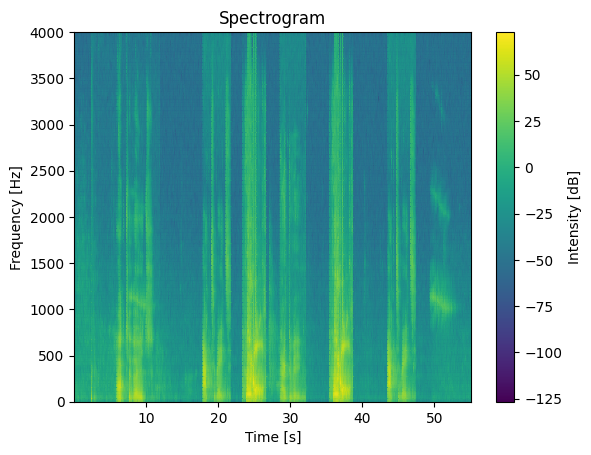

In [36]:
plot_spectrogram(freqs, times, X)

##### Visualizing the labels

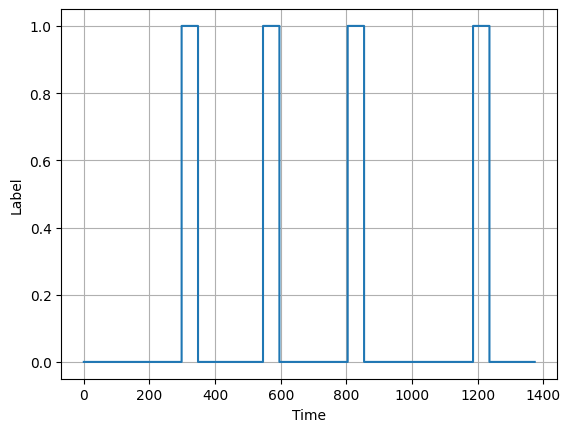

In [37]:
transforemer.visualize_labels(y)